In [1]:
import os
import pickle
import shutil 
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import math
from IPython import embed

Using MPI version 4.0, 1 processes


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
import pickle
radius_data = pickle.load(open("/develop/results/radius_data.pkl", "rb"))
combined_data = pickle.load(open("/develop/results/combined_data.pkl", "rb"))

In [3]:
# set up simulation constants

resolution =30

n_air = 1.0000003
n_Si = 1.45
n_SiO2 = 3.48

a = 0.5   # lattice period 

#pml_thickness = round(wavelength / 2,3)
pml_thickness = 0.780
height_hole = 5
height_SiO2 = height_hole
height_air = 7+2*pml_thickness
height_Si_initial= 0.5*(height_air-height_hole)
height_Si_add = 0.75*0.5*height_SiO2


cell_x = a
cell_y = a
cell_z = height_air

z_air = height_air

center_air = 0 
center_SiO2 = 0 
center_hole = 0
center_Si_initial = -0.5*height_hole -0.25*(height_air-height_hole)+0.005
center_Si_add = 0.5*height_Si_add

In [4]:

#initial_geometry setup

cell_size = mp.Vector3(cell_x,cell_y,cell_z)
pml_layers = [mp.PML(thickness = pml_thickness, direction = mp.Z)]

geometry = [mp.Block(size=mp.Vector3(mp.inf,mp.inf,height_air), 
                    center=mp.Vector3(0,0,center_air),
                    material=mp.Medium(index=n_air)),
           mp.Block(size=mp.Vector3(mp.inf,mp.inf,height_Si_initial),
                   center=mp.Vector3(0,0,center_Si_initial),
                   material=mp.Medium(index=n_Si))]


k_point = mp.Vector3(0,0,0)

## source ##
center_source = -0.5*height_hole-0.125*(height_air-height_hole) 
source_cmpt = mp.Ey

wavelength = 1.55
freq = 1 / wavelength


sources = [mp.Source(mp.ContinuousSource(frequency=freq),
                    component=source_cmpt,
                    center=mp.Vector3(0,0,center_source),
                    size=mp.Vector3(cell_x,cell_y,0))]


## flux monitor ##
nfreq = 1
df = 0
fr_center = 0.5*height_hole+0.125*(height_air-height_hole)
fr = mp.FluxRegion(center=mp.Vector3(0,0,fr_center), 
            size=mp.Vector3(cell_x, cell_y, 0))



if source_cmpt == mp.Ey:
    symmetries = [mp.Mirror(mp.X, phase=+1), #epsilon has mirror symmetry in x and y, phase doesn't matter
                  mp.Mirror(mp.Y, phase=-1)] #but sources have -1 phase when reflected normal to their direction
elif src_cmpt == mp.Ex:                      #use of symmetries important here, significantly speeds up sim
    symmetries = [mp.Mirror(mp.X, phase=-1),
                  mp.Mirror(mp.Y, phase=+1)]
elif src_cmpt == mp.Ez:
    symmetries = [mp.Mirror(mp.X, phase=+1),
                  mp.Mirror(mp.Y, phase=+1)]




In [5]:
sim = mp.Simulation(cell_size=cell_size,
                    geometry=geometry,
                    sources=sources,
                    k_point=k_point,
                    boundary_layers=pml_layers,
                    symmetries=symmetries,
                    resolution=resolution)
flux_object = sim.add_flux(freq, df, nfreq, fr)


sim.run(until=200)


combined_initial_flux = mp.get_fluxes(flux_object)[0]



# In[4]:


geometry.append(mp.Block(size=mp.Vector3(mp.inf,mp.inf,height_SiO2), 
                    center=mp.Vector3(0,0,center_SiO2),
                    material=mp.Medium(index=n_SiO2)))

geometry.append(mp.Block(size=mp.Vector3(mp.inf,mp.inf,height_Si_add), 
                    center=mp.Vector3(0,0,center_Si_add),
                    material=mp.Medium(index=n_Si)))


## initialize matrix for data collection ##
##########################################

num_holes = 15  # this is the number of pillars we will build
num_height = 15
min_r = 0.1
max_r = 0.245
min_h = 1.02
max_h = 5
data = np.zeros((4,num_holes))






-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00481892 s
Working in 3D dimensions.
Computational cell is 0.5 x 0.5 x 8.56667 with resolution 30
     block, center = (0,0,0)
          size (1e+20,1e+20,8.56)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-3.385)
          size (1e+20,1e+20,1.78)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
time for set_epsilon = 0.131247 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 172.51666666666665/200.0 = 86.3% done in 4.0s, 0.6s to go
on time step 10366 (time=172.767), 0.000385895 s/step
run 0 finished at t = 200.0 (12000 timesteps)


In [22]:
print(average_y)

NameError: name 'average_y' is not defined

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import transforms

height_average = []
radius_average = []
phases = []
phase_1 = []

if __name__ == "__main__":

    #A nice style baseline
    plt.style.use("seaborn-v0_8-white")

    #Need to generate some data for plotting.
    #2 variable data for the contour plot.
    # x = np.linspace(0,1*np.pi,100)
    # y = x
    # xx,yy = np.meshgrid(x,y)
    # z = np.sin(3*xx) + np.sin(0.25*yy) + xx - 0.5*yy

for key in radius_data:
        x=radius_data[key]['new_radius']
        y=radius_data[key]['depth']
        z=radius_data[key]['phase']
        average_x = np.mean(z,axis=0)
        height_average.append(average_x)

for key_1 in combined_data:
        x_1=combined_data[key_1]['radii']
        y_1=combined_data[key_1]['new_height']
        z_1=combined_data[key_1]['phase']
        average_y = np.mean(z_1,axis=1)
        radius_average.append(average_y)


for k,j in enumerate(np.linspace(0,num_height-1,15)):
    phases.append(radius_data[k]['phase'])

for m,i in enumerate(np.linspace(0,num_height-1,15)):
    phase_1.append(combined_data[m]['phase'])
    
#x = x[0]
phases = np.asarray(phases)
phase_1 = np.asarray(phase_1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [48]:
transmission = []
x = []
y = []
phases = []


for k,j in enumerate(np.linspace(0,num_height-1,15)):
    y.append(combined_data[k]['height'])
    # combined_data[][]
    x.append(combined_data[k]['radii'])
    #y.append(combined_data[k]['new_height'])
    phases.append(combined_data[k]['phase'])
    transmission.append(combined_data[k]['flux'])

    
#x = x[0]
x = np.asarray(x[0])
y = np.asarray(y)
phases = np.asarray(phases)
transmission = np.asarray(transmission)

radius_average = np.mean(phases, axis=1)
height_average = np.mean(phases, axis=0)
radius_average2 = np.mean(transmission, axis=1)
height_average2 = np.mean(transmission, axis=0)

In [49]:
xx,yy = np.meshgrid(x,y)

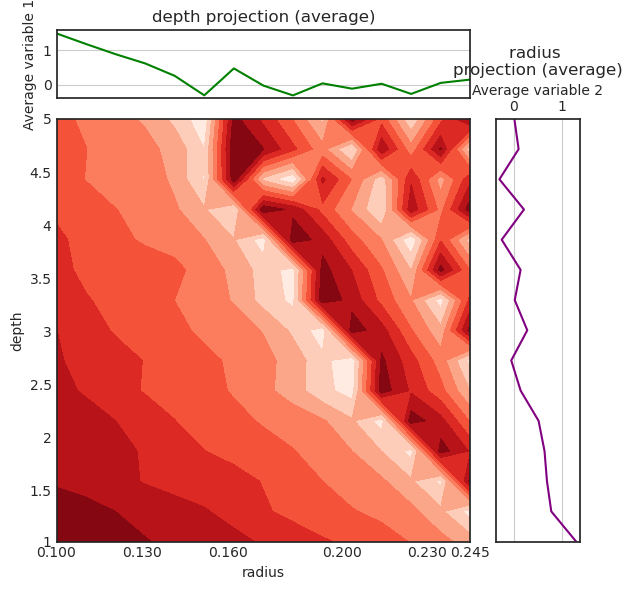

In [50]:
    #Setup the figure - mess with these and see how they impact the plot.
    height = 6
    ratio = 4
    space = 0.3

    #Initialize the figure and gridspec.
    f = plt.figure(figsize=(height, height))
    gs = plt.GridSpec(ratio + 2, ratio + 1)
    ax_joint = f.add_subplot(gs[1:, :-1])
    ax_marg_x = f.add_subplot(gs[0, :-1], sharex=ax_joint)
    ax_marg_y = f.add_subplot(gs[1:, -1], sharey=ax_joint)

    #Here, we are turning on and off axis ticks and labels where
    # appropriate. These can be modified as needed.
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_x.get_xticklabels(minor=True), visible=False)
    plt.setp(ax_marg_x.yaxis.get_majorticklines(), visible=True)
    plt.setp(ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(ax_marg_x.get_yticklabels(), visible=True)
    plt.setp(ax_marg_x.get_yticklabels(minor=True), visible=False)
    ax_marg_x.tick_params(top=False, right=False, bottom=False)
    ax_marg_x.yaxis.grid(True)

    plt.setp(ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(minor=True), visible=False)
    plt.setp(ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(ax_marg_y.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_xticklabels(minor=True), visible=False)

    ax_marg_y.xaxis.grid(True)
    ax_marg_y.tick_params(top=True, left=False, right=False, bottom=False)
    ax_marg_y.xaxis.set_label_position('top')
    ax_marg_y.xaxis.tick_top()

    #The y-projection need to be rotated.
    base = ax_marg_y.transData
    rot = transforms.Affine2D().rotate_deg(270)

    #Finally, we plot the things!
    ct = ax_joint.contourf(xx,yy,phases, cmap="Reds")
    ax_marg_x.plot(x,height_average, c='green')
    ax_marg_y.plot(-y,radius_average, transform=rot+base, c='purple')
    #The (-x) flips the plot appropriately.

    #Axis lables and titles - never forget! 
    ax_joint.set_ylabel("depth")
    ax_joint.set_xlim(0.1, 0.245)
    ax_joint.set_xticks([0.1,0.13,0.16,0.2,0.23,0.245])
    ax_joint.set_xlabel("radius")

    ax_marg_x.set_title('depth projection (average)')
    ax_marg_y.set_title('radius \nprojection (average)')
    ax_joint.set_yticks([1.02, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
    ax_joint.set_yticklabels([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

    ax_marg_x.set_ylabel("Average variable 1")
    ax_marg_y.set_xlabel("Average variable 2")

    #Adjust the subplot spacings to look nice.
    plt.tight_layout()
    f.subplots_adjust(hspace=space, wspace=space)

    #Save it
    f.savefig("contour_plot_with_projection.pdf")

    #Show it
    plt.show()

In [42]:
print(y)

[1.02       1.30428571 1.58857143 1.87285714 2.15714286 2.44142857
 2.72571429 3.01       3.29428571 3.57857143 3.86285714 4.14714286
 4.43142857 4.71571429 5.        ]


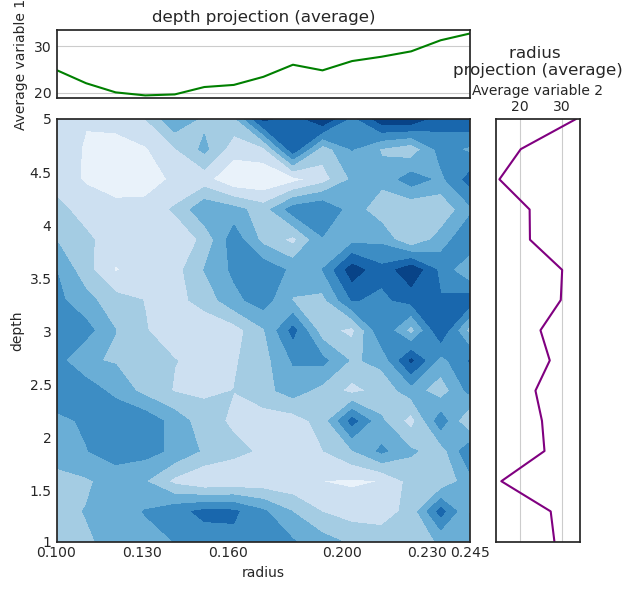

In [52]:
    #Setup the figure - mess with these and see how they impact the plot.
    height = 6
    ratio = 4
    space = 0.3

    #Initialize the figure and gridspec.
    f = plt.figure(figsize=(height, height))
    gs = plt.GridSpec(ratio + 2, ratio + 1)
    ax_joint = f.add_subplot(gs[1:, :-1])
    ax_marg_x = f.add_subplot(gs[0, :-1], sharex=ax_joint)
    ax_marg_y = f.add_subplot(gs[1:, -1], sharey=ax_joint)

    #Here, we are turning on and off axis ticks and labels where
    # appropriate. These can be modified as needed.
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_x.get_xticklabels(minor=True), visible=False)
    plt.setp(ax_marg_x.yaxis.get_majorticklines(), visible=True)
    plt.setp(ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(ax_marg_x.get_yticklabels(), visible=True)
    plt.setp(ax_marg_x.get_yticklabels(minor=True), visible=False)
    ax_marg_x.tick_params(top=False, right=False, bottom=False)
    ax_marg_x.yaxis.grid(True)

    plt.setp(ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(minor=True), visible=False)
    plt.setp(ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(ax_marg_y.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_xticklabels(minor=True), visible=False)

    ax_marg_y.xaxis.grid(True)
    ax_marg_y.tick_params(top=True, left=False, right=False, bottom=False)
    ax_marg_y.xaxis.set_label_position('top')
    ax_marg_y.xaxis.tick_top()

    #The y-projection need to be rotated.
    base = ax_marg_y.transData
    rot = transforms.Affine2D().rotate_deg(270)

    #Finally, we plot the things!
    ct = ax_joint.contourf(xx,yy,transmission, cmap="Blues")
    ax_marg_x.plot(x,height_average2, c='green')
    ax_marg_y.plot(-y,radius_average2, transform=rot+base, c='purple')
    #The (-x) flips the plot appropriately.

    #Axis lables and titles - never forget! 
    ax_joint.set_ylabel("depth")
    ax_joint.set_xlim(0.1, 0.245)
    ax_joint.set_xticks([0.1,0.13,0.16,0.2,0.23,0.245])
    ax_joint.set_xlabel("radius")

    ax_marg_x.set_title('depth projection (average)')
    ax_marg_y.set_title('radius \nprojection (average)')
    ax_joint.set_yticks([1.02, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
    ax_joint.set_yticklabels([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

    ax_marg_x.set_ylabel("Average variable 1")
    ax_marg_y.set_xlabel("Average variable 2")

    #Adjust the subplot spacings to look nice.
    plt.tight_layout()
    f.subplots_adjust(hspace=space, wspace=space)

    #Save it
    f.savefig("contour_plot_with_projection.pdf")

    #Show it
    plt.show()